In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
from numpy.random import normal


# Normal DIstribution

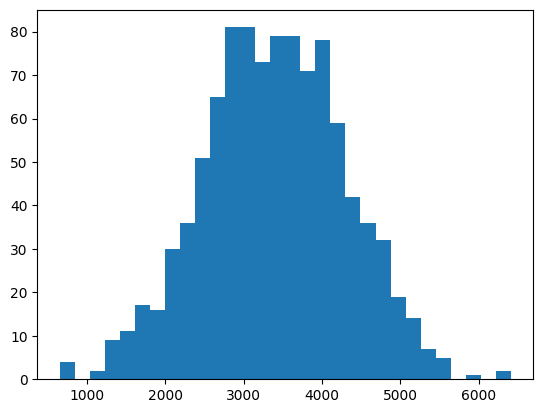

In [2]:
data = normal(loc=3400, scale=925, size=1000)

fsd = data.tolist()

count, bins, ignored = plt.hist(data, 30)
plt.show()

In [3]:
# https://www.ndbc.noaa.gov/histsearch.php?station=48216&year=2015&f1=&t1a=&v1a=&t1b=&v1b=&c1=&f2=&t2a=&v2a=&t2b=&v2b=&c2=&f3=&t3a=&v3a=&t3b=&v3b=
arctic_df = pd.read_csv("arctic_wave.csv")["DPD"][1:]

arctic = arctic_df.tolist()
waves = []

for value in arctic:
    if float(value) < 99:
        waves.append(float(value))
    

6.306298600311028

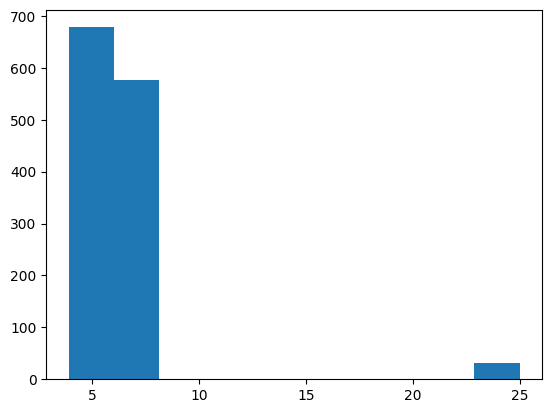

In [4]:
total= 0
vals = 0
plt.hist(waves)
for val in waves:
    total += 1
    vals += val

vals/total

In [5]:
def rand_period():
    pick = random.choice(waves)
    return pick

def rand_wave():
    pick = rand_period()
    wavelength = (9.8 * pow(pick,2))/(2*3.14)
    return (wavelength, pick)

# result is wavelength, time period

wavelength, time_period = rand_wave()        


  # Welding And Fracturing Model

In [6]:
def welds(C, time):
    N = (-0.001/2)*pow(C,2)*time
    return N

Text(0.5, 1.0, 'Model For FSD')

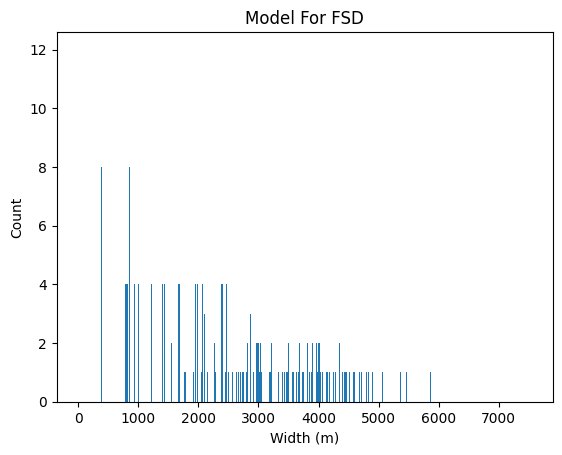

In [7]:
# make an initial dictionary of sizes and counts based off the normal distribution with mean 2400
meters_sq = 0

for val in fsd:
    meters_sq += pow(round(val),2)
    
fsd_dict = {}

for value in fsd:
    if round(value) in fsd_dict:
        fsd_dict[round(value)] += 1
    else:
        fsd_dict[round(value)] = 1
#fsd[24000.0] = 1                          # ice width in meters
total_time = 0
break_num = 0
weld_num = 0
events = 0

for i in range(10000000000000000):
    if total_time >= 86400*7:                 # stops after one week has passed
        break
    events += 1                          # get the amount of possible breaks/welds
    total_floes = sum(list(fsd_dict.values()))  # get the total floes
    sizes = list(fsd_dict.keys())               # get a list of all the available sizes 
    location = float(random.choice(sizes))   # choose a random spot were the ice will split
    wavelength, time_period = rand_wave()         # get a random wavelength
    total_time += time_period                     # add wave period to total time
    weld = welds(1,time_period)                   # find the welding for that time period of wave
    weld_perc = (meters_sq + (meters_sq *weld))/meters_sq   # find out what % of floes there should be with welding
    floes_decreased = total_floes-(total_floes*weld_perc) # how many floes get welded
    
    if floes_decreased > 0:
        for i in range(int(floes_decreased)):
            rand_floe = float(random.choice(sizes))   # choose a random spot were the ice will weld
            welded_width = rand_floe * 2             # find the welded width
            if fsd_dict[rand_floe] < 4:
                floes_decreased += 1               # if there are not at least 4 floes to weld it picks a new spot
            else:
                weld_num +=1
                if welded_width in fsd_dict:
                    fsd_dict[welded_width] += 1              # add the larger floe to the dict by adding one
                    fsd_dict[rand_floe] -= 4
                else:
                    fsd_dict[welded_width] = 1
                    fsd_dict[rand_floe] -= 4

    if fsd_dict[location] == 0:
        continue
    elif location/wavelength > 1:            # see if the ice will break
        break_num += 1
        new_ice = location/2              # make a variable for the new ice dimensions  
        fsd_dict[location] += -1
        if new_ice in fsd_dict:                 # check and see if this new ice is in the dict
            fsd_dict[new_ice] += 4              # add four to the count (bc ice divides into four pices)
                       # remove one from the old size since it broke
        else:                              
            fsd_dict[new_ice] = 4               # if not in dict, add to dict

bps = (break_num/86400)  # breaks per second
bpm = bps* 60   # breaks per minute

import numpy as np

sizes = list(fsd_dict.keys()) 
counts = list(fsd_dict.values())

d = {'sizes': sizes, 'count': counts}
ice = pd.DataFrame(data=d)

plt.bar(sizes, counts,
        width = 1.8)
 
plt.xlabel("Width (m)")
plt.ylabel("Count")
plt.title("Model For FSD")


ValueError: too many values to unpack (expected 3)

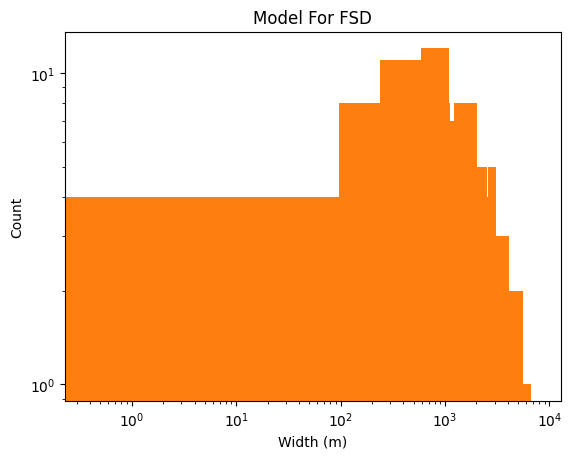

In [8]:

import numpy as np

sizes = list(fsd_dict.keys()) 
counts = list(fsd_dict.values())

d = {'sizes': sizes, 'count': counts}
ice = pd.DataFrame(data=d)

plt.bar(sizes, counts,
        width = 1.8)
 
plt.xlabel("Width (m)")
plt.ylabel("Count")
plt.title("Model For FSD")
plt.yscale("log")
plt.xscale("log")

count, bins, ignored = plt.bar(sizes, counts, 500)



In [ ]:
# fracture and weld rate

pfrac = break_num/events
pweld = weld_num/events
no_event = 1 - (pfrac + pweld)

print("Frature Probability =", pfrac,
      "\nWeld Probability =", pweld, 
      "\nNo Event Probability =", no_event,
     "\nTotal Floes =", sum(list(fsd_dict.values())))